In [1]:
from main_settings import analysis_begin, analysis_end, weights, pars, res, assets, mods

if abs(sum(weights.values()) - 1) > 0.000001:
    raise Exception('Sum of weights is not 1', sum(weights.values()))

In [2]:
from imposing_functions import Enginehouse
e = Enginehouse(**pars)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Trend analysis

- Regression function computes an Ordinary Least Squares model for every word frequency for the whole period and a limited number of periods (by default 12, 6 and 3 months) 
- The coefficients are normalized by mean frequency by month (coef_norm) and peak frequency: maximum frequency by month (coef_norm_max). It also saves the results to a .csv file
- Results are saved in: '../out/res/'
- In the coefs_weighted_site.csv file you will find regression coefficients for the whole period. Similarly files which names end with "3", "6", "12" cover shorter periods – if you want to use them, just remove the `regression_periods_length` parameter or set it to `('', 12, 6, 3)`'.

In [4]:
e.reg(method='count', regression_periods_length=('',))


0 13900 0:00:00.000016
1000 13900 0:00:00.637652
2000 13900 0:00:00.653279
3000 13900 0:00:00.757034
4000 13900 0:00:00.638636
5000 13900 0:00:00.641021
6000 13900 0:00:00.691734
7000 13900 0:00:00.685642
8000 13900 0:00:00.670446
9000 13900 0:00:00.649715
10000 13900 0:00:00.701054
11000 13900 0:00:00.697513
12000 13900 0:00:00.723279
13000 13900 0:00:00.651651


In [5]:
coef=pd.read_csv(res + 'coefscount_weighted_site.csv', index_col=0)

In [6]:
coef.columns

Index(['freq_2021-11', 'freq_2021-10', 'freq_2021-09', 'freq_2021-08',
       'freq_2021-07', 'freq_2021-06', 'freq_2021-05', 'freq_2021-04',
       'freq_2021-03', 'freq_2021-02', 'freq_2021-01', 'freq_2020-12',
       'freq_2020-11', 'freq_2020-10', 'freq_2020-09', 'freq_2020-08',
       'freq_2020-07', 'freq_2020-06', 'freq_2020-05', 'freq_2020-04',
       'freq_2020-03', 'freq_2020-02', 'freq_2020-01', 'freq_2019-12',
       'freq_2019-11', 'freq_2019-10', 'freq_2019-09', 'freq_2019-08',
       'freq_2019-07', 'freq_2019-06', 'freq_2019-05', 'freq_2019-04',
       'freq_2019-03', 'freq_2019-02', 'freq_2019-01', 'freq_2018-12',
       'freq_2018-11', 'freq_2018-10', 'freq_2018-09', 'freq_2018-08',
       'freq_2018-07', 'freq_2018-06', 'freq_2018-05', 'freq_2018-04',
       'freq_2018-03', 'freq_2018-02', 'freq_2018-01', 'freq_2017-12',
       'freq_2017-11', 'freq_2017-10', 'freq_2017-09', 'freq_2017-08',
       'freq_2017-07', 'freq_2017-06', 'freq_2017-05', 'freq_2017-04',
      

## Let's sort our results by decreasing regression coefficient

In [7]:
# We found that coefficient >0.0125 filters non-significant, non-tech words well. But you can experiment with different values
coefs=coef[coef['coef_norm']>0.0125].sort_values('coef',ascending=False)

- the most trending words include Amazon, platform and worker

- Regression function computes an Ordinary Least Squares model for every word frequency for the whole period and a limited number of periods (by default 12, 6 and 3 months) 
- The coefficients are normalized by mean frequency by month (coef_norm) and peak frequency: maximum frequency by month (coef_norm_max). It also saves the results to a .csv file
- Results are saved in: '../out/res_all/' (or any other directory you define in the main_settings.py file
- In the coefscount_weighted_site.csv file you will find regression coefficients for the whole period, similarly files which names end with "3", "6", "12" cover shorter periods

In [8]:
# choose keywords for trend analysis
selected_coefs=['vaccin','5g','app_store','tiktok']

In [9]:
# limit our df to the rows pertaining to our selected keywords and do some cleaning
sel=coefs.loc[selected_coefs]
col=['coef','coef_norm_max','coef_norm']
sel.drop(col, axis=1,inplace=True)
sel.columns=[col.strip('freq_') for col in sel.columns]

In [10]:
# prepare data in format suitable for seaborn visualization
selT=sel.transpose()
selT=selT.iloc[1:]
selT=selT.iloc[::-1]
selT.index=pd.to_datetime(selT.index)

In [11]:
# let's smooth our data by showing 3 months rolling mean
data = selT.rolling(3).mean()

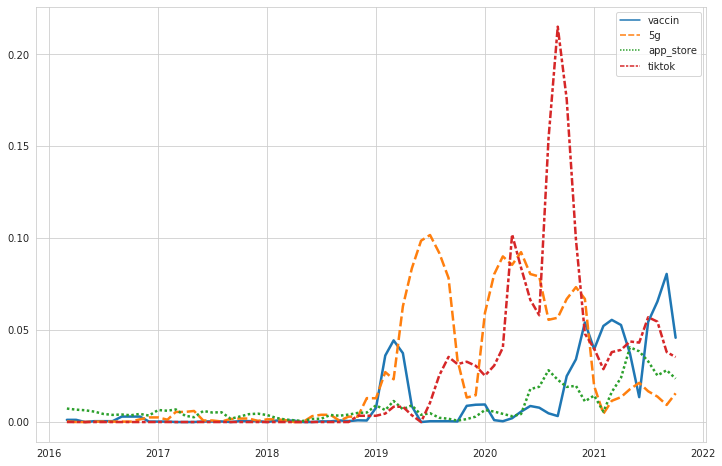

In [12]:
# visualize selected trends
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.lineplot(data=data, linewidth=2.5)

# Choose keywords for co-occurrence analysis

In [13]:
#Here you can define the list of words for the co-occurrence and sentiment analyses

important=['app_store','vaccin','facial_recognit']

In [14]:
e.cooc(important, method='count')

guardian 0:00:00.000003
0 2016-01
1 2016-02
2 2016-03
3 2016-04
4 2016-05
5 2016-06
6 2016-07
7 2016-08
8 2016-09
9 2016-10
10 2016-11
11 2016-12
12 2017-01
13 2017-02
14 2017-03
15 2017-04
16 2017-05
17 2017-06
18 2017-07
19 2017-08
20 2017-09
21 2017-10
22 2017-11
23 2017-12
24 2018-01
25 2018-02
26 2018-03
27 2018-04
28 2018-05
29 2018-06
30 2018-07
31 2018-08
32 2018-09
33 2018-10
34 2018-11
35 2018-12
36 2019-01
37 2019-02
38 2019-03
39 2019-04
40 2019-05
41 2019-06
42 2019-07
43 2019-08
44 2019-09
45 2019-10
46 2019-11
47 2019-12
48 2020-01
49 2020-02
50 2020-03
51 2020-04
52 2020-05
53 2020-06
54 2020-07
55 2020-08
56 2020-09
57 2020-10
58 2020-11
59 2020-12
60 2021-01
61 2021-02
62 2021-03
63 2021-04
64 2021-05
65 2021-06
66 2021-07
67 2021-08
68 2021-09
69 2021-10
70 2021-11


In [15]:
coocs=pd.read_csv(res + 'cooccount_weighted_newall.csv', index_col=0)

The columns reveal the examined word (e.g. Huawei), while the rows show the most frequently co-occurring words. The various columns mark the different methods of calculations. The two main groups are *count* and *bool*: for more details see the *0_text_transformation_guide*. Our preferred measure is *count_freq_weighted*: the number of times the term in the row appear in articles together with word in the column is divided by the number of times the word in the column is mentioned across all articles (multiplied by 100)

In [16]:
# Print co-occurring terms for a given keyword. In this case 'facial_recognit'
coocs.sort_values('facial_recognit_count_freq_weighted',ascending=False)[:20]

app_store_count_freq_weighted  \
facial_recognit                         1.004016   
amazon                                 82.931727   
review                                 27.911647   
pro                                    16.064257   
samuel                                 17.670683   
photograph_samuel                      17.469880   
gibbsth_guardian                       17.469880   
gibbsth                                17.469880   
huawei                                  4.016064   
wale                                    1.004016   
galaxi                                  4.417671   
trial                                   2.610442   
employe                                 7.831325   
platform                               48.795181   
ban                                    26.305221   
chines                                 14.658635   
china                                  19.879518   
2018                                   10.240964   
worker                                  8.634538   
protest                                 6.224900   

                   app_store_count_freq_weighted_normalized  \
facial_recognit                                   84.666910   
amazon                                           665.882319   
review                                           409.275359   
pro                                              313.329383   
samuel                                           453.731963   
photograph_samuel                                457.845639   
gibbsth_guardian                                 459.598618   
gibbsth                                          458.725295   
huawei                                            86.425328   
wale                                             210.497014   
galaxi                                           171.294922   
trial                                            214.279603   
employe                                          156.236852   
platform                                         623.946120   
ban                                              642.642298   
chines                                           564.370379   
china                                            639.742800   
2018                                             405.441791   
worker                                           159.577226   
protest                                          400.379564   

                   app_store_count_freq_weighted_normalized_root  \
facial_recognit                                         9.219921   
amazon                                                234.995257   
review                                                106.881005   
pro                                                    70.946485   
samuel                                                 89.541910   
photograph_samuel                                      89.434379   
gibbsth_guardian                                       89.605427   
gibbsth                                                89.520253   
huawei                                                 18.630343   
wale                                                   14.537620   
galaxi                                                 27.508627   
trial                                                  23.650886   
employe                                                34.979160   
platform                                              174.486572   
ban                                                   130.018643   
chines                                                 90.955479   
china                                                 112.773129   
2018                                                   64.436905   
worker                                                 37.119747   
protest                                                49.923167   

                   app_store_bool_freq_weighted  \
facial_recognit                        2.127660   
amazon                                28.936170   
review              

## Sentiment analysis

Sentiment is calculated using the VADER package (Valence Aware Dictionary and SEntiment Reasoner). VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in short texts.  

All paragraphs in articles containing the given term are modified to exclude this term and assigned a score between -1 (most extreme negative) and 1 (most extreme positive) by VADER. Removal of terms is meant to exclude sentiment of the term itself, because the term may not be emotionally neutral, e.g. when some technologies or companies attempt to solve a negative issue. In such case, the neighbourhood’s scores would be positive, but the negative term would bring the paragraph’s score down.

In [17]:
e.sentiment(important, method='count')

2016-01 2021-12-22 15:01:28.503287
articles read 2021-12-22 15:01:29.269246 235
0 2021-12-22 15:01:29.269379
4
2016-02 2021-12-22 15:01:30.695548
articles read 2021-12-22 15:01:31.561261 236
0 2021-12-22 15:01:31.561473
6
2016-03 2021-12-22 15:01:33.786793
articles read 2021-12-22 15:01:34.576933 218
0 2021-12-22 15:01:34.577200
2
2016-04 2021-12-22 15:01:35.556182
articles read 2021-12-22 15:01:36.305844 203
0 2021-12-22 15:01:36.305956
4
2016-05 2021-12-22 15:01:37.739896
articles read 2021-12-22 15:01:38.372170 172
0 2021-12-22 15:01:38.372282
4
2016-06 2021-12-22 15:01:39.356044
articles read 2021-12-22 15:01:39.948629 174
0 2021-12-22 15:01:39.948856
6
2016-07 2021-12-22 15:01:40.813843
articles read 2021-12-22 15:01:41.312171 139
0 2021-12-22 15:01:41.312448
4
2016-08 2021-12-22 15:01:42.402702
articles read 2021-12-22 15:01:42.877041 166
0 2021-12-22 15:01:42.877179
4
2016-09 2021-12-22 15:01:43.618300
articles read 2021-12-22 15:01:44.225595 180
0 2021-12-22 15:01:44.226091
6
2

In [18]:
sents=pd.read_csv(res + 'sentimentscount_mod.csv', index_col=0)

In [19]:
# let's smooth our data by showing 3 months rolling mean
data = sents.rolling(3).mean()

In [20]:
data

facial_recognit  facial_recognit_count  app_store  app_store_count  \
2016-01              NaN                    NaN        NaN              NaN   
2016-02              NaN                    NaN        NaN              NaN   
2016-04         0.268211              64.333333   0.182321       237.333333   
2016-05         0.242554              59.000000   0.244067       213.000000   
2016-06         0.136116              68.666667   0.159592       153.666667   
...                  ...                    ...        ...              ...   
2021-03              NaN                    NaN   0.067154       121.000000   
2021-05              NaN                    NaN   0.063808       118.333333   
2021-07              NaN                    NaN   0.075360       102.000000   
2021-08              NaN                    NaN   0.075859       110.000000   
2020-10              NaN                    NaN        NaN              NaN   

           vaccin  vaccin_count  
2016-01       NaN           NaN  
2016-02       NaN           NaN  
2016-04       NaN           NaN  
2016-05       NaN           NaN  
2016-06       NaN           NaN  
...           ...           ...  
2021-03 -0.070788    126.000000  
2021-05 -0.095803    135.000000  
2021-07 -0.064517    151.000000  
2021-08 -0.005535    183.000000  
2020-10 -0.029260    192.666667  

[71 rows x 6 columns]

In [21]:
data=data[data.columns.drop(list(data.filter(regex='_count')))].sort_index()

In [22]:
data.index = pd.to_datetime(data.index)

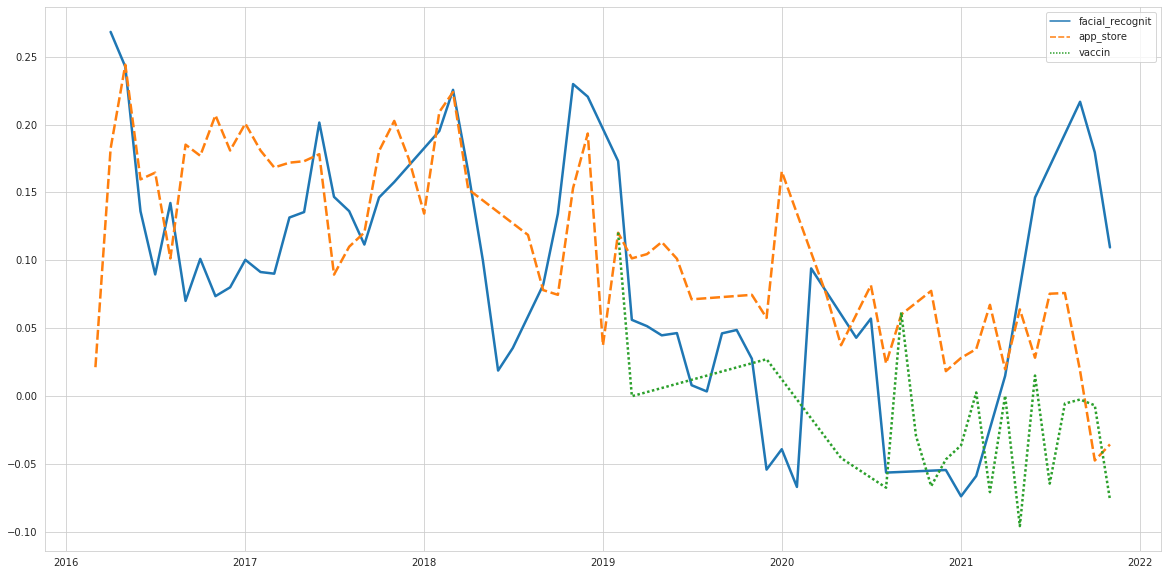

In [23]:
# visualize selected sentiments dynamics
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ax=sns.lineplot(data=data, linewidth=2.5)

## In the next tutorial you will learn how to apply topic modelling algorithms on our dataset. See: B1_LDA.ipynb